In [1]:
from pymopt.voxel import VoxelDicomModel
from pymopt.optics import OBD
import datetime

dt_now = datetime.datetime.now()
filehead = str(int(dt_now.strftime('%Y%m%d'))-int(2e7))+dt_now.strftime('_%H%M%S')

In [2]:
dicom_path = '../DICOMfile4'
save_path = '../result/'+filehead+'_dicom4skin20_liner'
coment = 'skin dms = 9.8'

params = {
    "th_skin": 2.,
    "th_ct": 0.3,
    
    "n_sp": 1.0,
    "n_tr": 1.54,
    "n_ct": 1.56,
    "n_skin": 1.375,
    "n_air": 1.0,
    
    "ma_sp": 1e-08,
    "ma_tr": 0.0173,
    "ma_ct": 0.0173,
    "ma_skin": 0.015,
    
    "ms_sp": 1e-08,
    "ms_tr": 16.7825,
    "ms_ct": 16.7825,
    "ms_skin": 12.25,#6.35595,
    
    "g_sp": 0.9,
    "g_tr": 0.9375,
    "g_ct": 0.9375,
    "g_skin": 0.92,
}

monte_params = {
    'nPh':1e7,
    'model_type':'linear',#'linear','binary'
    'd_beam':0.39,
    'fluence_mode':False,#'3D',
    'nr':100,'nz':250,'dr':0.1,'dz':0.1,   
}
print(save_path)

../result/201105_205057_dicom4skin20_liner


In [3]:
dcm = VoxelDicomModel()
dcm.import_dicom(dicom_path)

ConstPixelDims: (1024, 1024, 1098)
ConstPixelSpacing: (0.02770302090982, 0.02770302090982, 0.02770302090982)
Data infomation
Dataset.file_meta -------------------------------
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: ['', 'ISO 2022 IR 87']
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.392.200036.9110..1.1.201701261928380820
(0008, 0020) Study Date                          DA: '20170126'
(0008, 0021) Series Date                         DA: '20170126'
(0008, 0022) Acquisition Date                    DA: '20170126'
(0008, 0023) Content Date                        DA: '20170126'
(0008, 0030) Study Time                          TM: '191630.0000'
(0008, 0031) Series Time                    

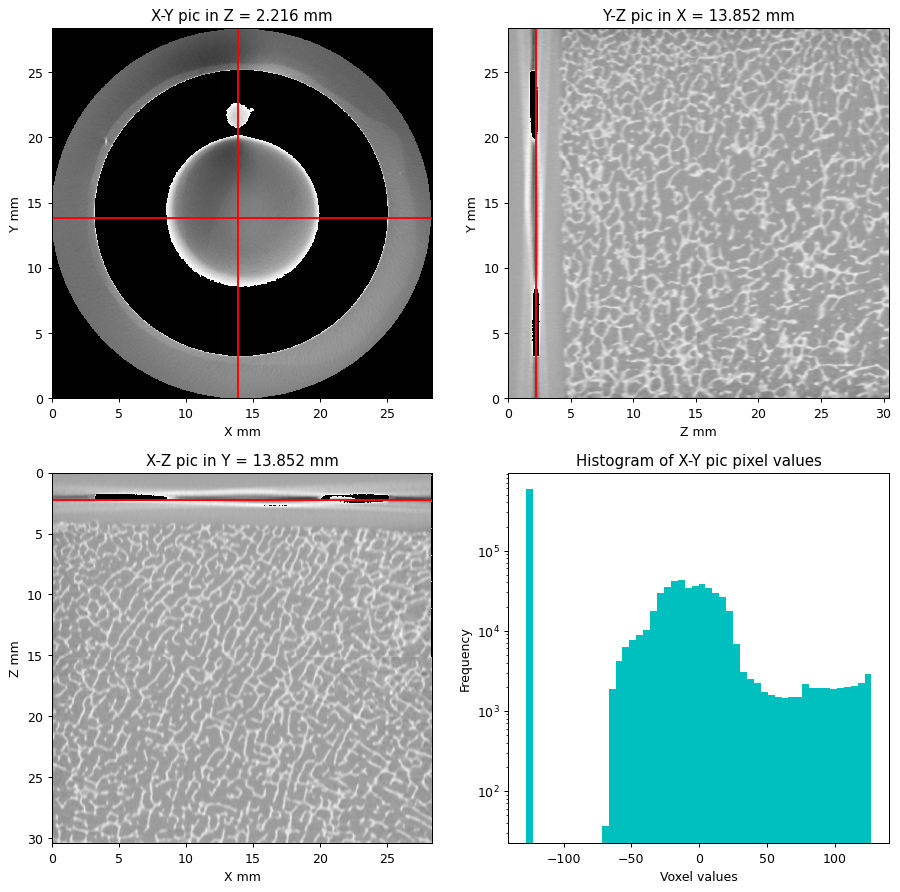

In [4]:
dcm.rot180_y()
dcm.display_cross_section(xx = 500,yy = 500,zz = 80,graph_type = 'ALL',cmap = 'gray')

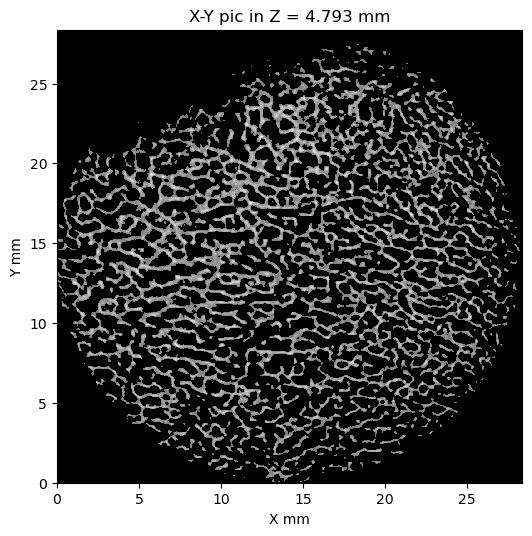

In [5]:
dcm.check_threshold(threshold=55,cmap = 'gray',zz = 173,graph_type = 'XY')

Trimming parameters
              right left upper lower    top bottom
Pixel number      0    0     0     0    173      0
Position [mm]     0    0     0     0  4.793      0


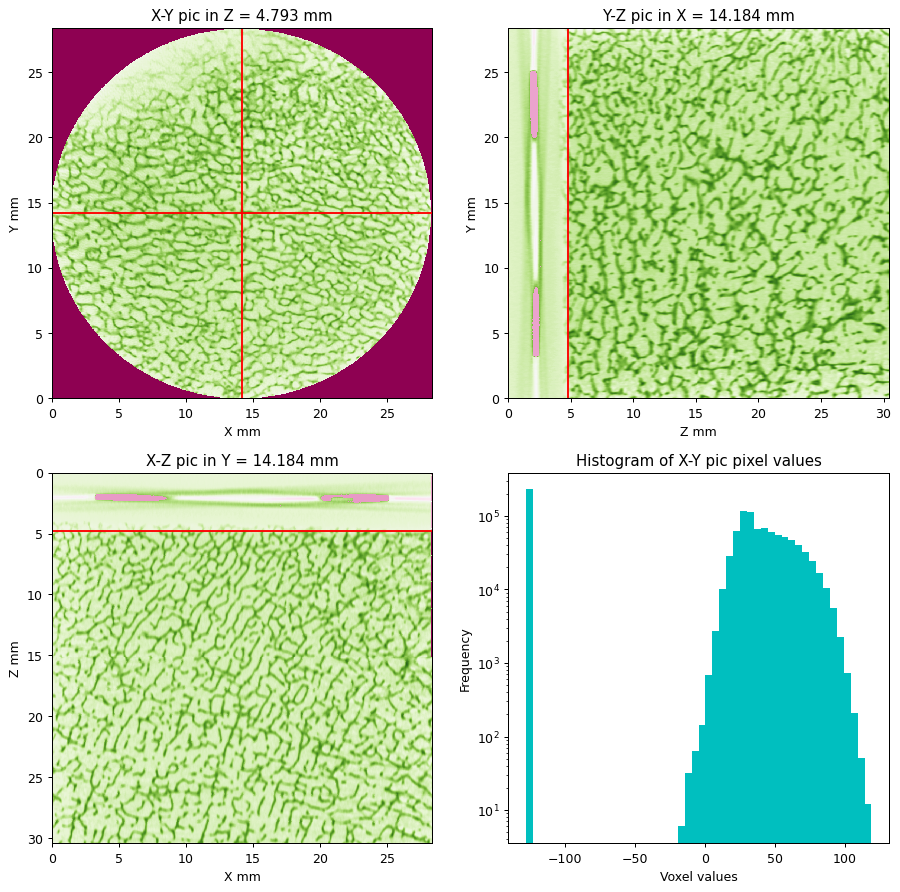

In [6]:
trim_params = {
    'int_pix':True,
    'right': 0, 
    'left': 0,
    'upper': 0,
    'lower':0,
    'top':173,
    'bottom':0,
    'cmap':'PiYG',
}
dcm.trim_area(**trim_params)

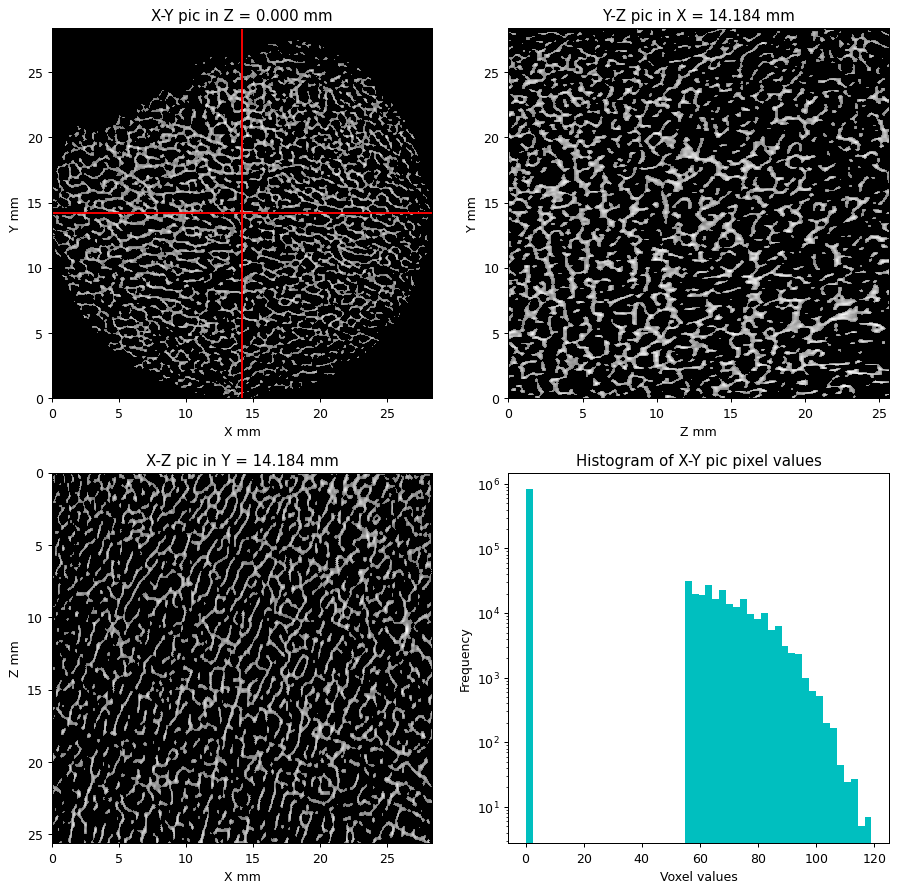

#########  Size  #########
* Image shape was changed
  from (1024,1024,1098)
  to   (1024,1024,925)

* Memory area size for
  voxel storage was changed
  from 1151.336 Mbyte
  to   969.933 Mbyte


In [7]:
dcm.set_trim(cmap = 'gray')

In [8]:
dcm.set_params(params)
dcm.set_monte_params(**monte_params)
dcm.model.get_params()

,sp,tr,ct,skin,air
n,1.000000e+00,1.5400,1.5600,1.375,1.0
ma,1.000000e-08,0.0173,0.0173,0.015,0.0
ms,1.000000e-08,16.7825,16.7825,12.250,0.0
g,9.000000e-01,0.9375,0.9375,0.920,0.0
th,0.000000e+00,0.0000,0.3000,2.000,0.0


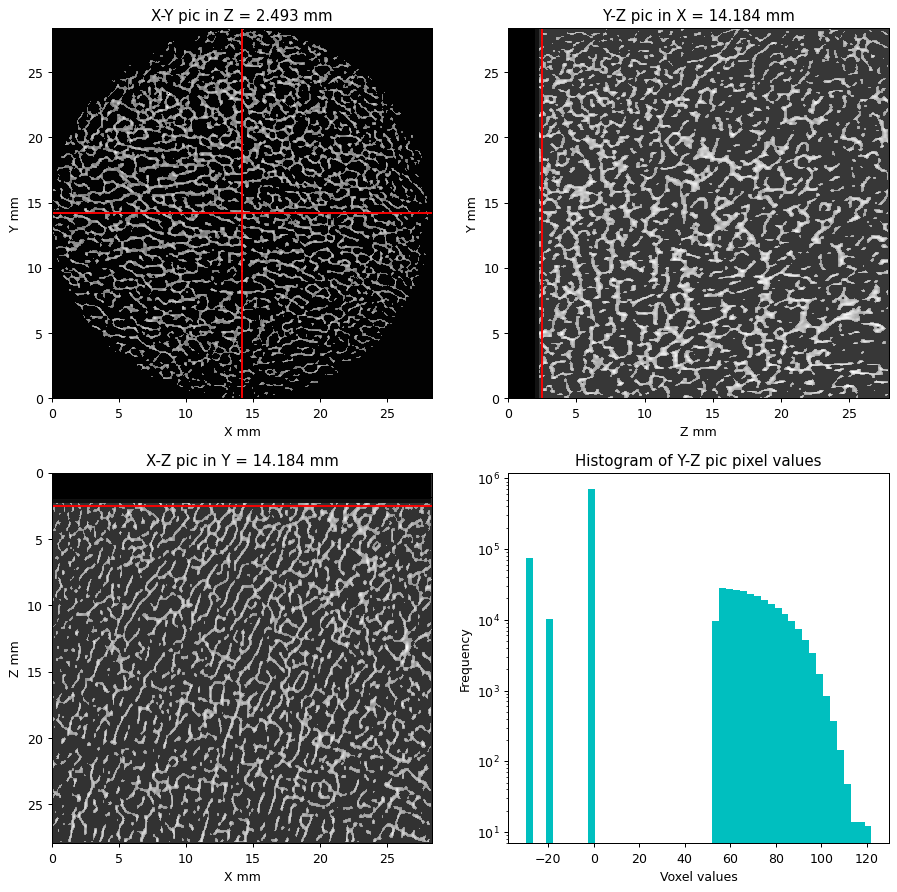

In [9]:
dcm.build()
dcm.display_cross_section(image = dcm.model.voxel_model,
                          xx = 512,yy = 512,zz = 90,
                          cmap = 'gray',hist_type = 'YZ')

TEM00を入力


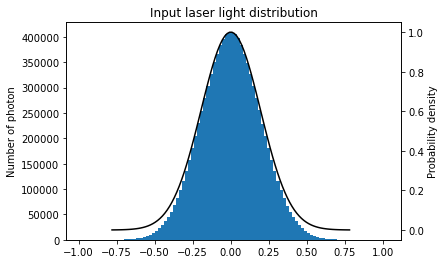

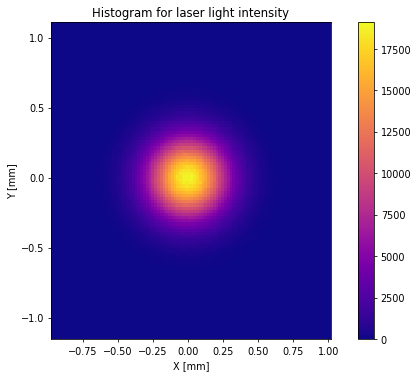


###### Start ######

Progress: 0.163 [％]
Calculation time: 0 minutes 59.641 seconds.

Progress: 0.531 [％]
Calculation time: 2 minutes 6.797 seconds.

Progress: 1.471 [％]
Calculation time: 4 minutes 24.639 seconds.

Progress: 4.082 [％]
Calculation time: 9 minutes 31.346 seconds.

Progress: 11.331 [％]
Calculation time: 19 minutes 57.036 seconds.

Progress: 21.221 [％]
Calculation time: 39 minutes 33.927 seconds.

Progress: 34.468 [％]
Calculation time: 1 h 12.000 minutes.

Progress: 50.333 [％]
Calculation time: 2 h 8.000 minutes.

Progress: 66.125 [％]
Calculation time: 3 h 33.000 minutes.

Progress: 80.433 [％]
Calculation time: 5 h 28.000 minutes.

Progress: 92.049 [％]
Calculation time: 7 h 29.000 minutes.

Progress: 98.501 [％]
Calculation time: 8 h 51.000 minutes.

Progress: 99.944 [％]
Calculation time: 9 h 27.000 minutes.

Progress: 100.0 [％]
Calculation time: 9 h 42.000 minutes.


###### Finish ######
Maximum step number: 18034
######
Mean Rd 0.619192
Mean Tt 0.018684

Calculation time

In [10]:
dcm.start()

In [11]:
dcm.save_result(save_path,coment=coment)

Monte Carlo results saved in 
-> ../result/201105_205057_dicom4skin20_liner_LID.pkl.bz2

Calculation conditions are saved in
-> ../result/201105_205057_dicom4skin20_liner_info.json

Calculation time: 0 minutes 39.242 seconds.


In [12]:
obd = OBD()
obd.set_monte_data(dcm.get_result())
#obd.load_file(save_path)
opt_params ={
    'start':-10,'end':65,'split':1,
    'outerD_1':50,'efl_1':100,'bfl_1':93.41,
    'ct_1':10,'et_1':3.553,'r_1':51.68,'n_1':1.517,
    'outerD_2' : 50,'efl_2' : 50,'bfl_2' : 43.28,
    'ct_2':12,'et_2':3.01,'r_2':39.24,'n_2':1.758,
    'slit_outerD':50,'slit_D':20,'slit_width':2,'slit_thickness':5,
    'd_pd':3,
}
obd.set_params(opt_params)
obd.start()
obd.save_result(save_path)

100%|██████████| 75/75 [02:21<00:00,  1.89s/it]

Calculation time: 2 minutes 22.046 seconds.
